The following code is for plotting data collected from the SIHMD simulation. Graphs plot percent of the population for each compartment over time.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# load csv
file_path = "C:/Users/amyyy/Downloads/sihmd_batch_average_2025-06-27T17-28-26-530Z.csv"

# read csv
sim_df = pd.read_csv(file_path) 

# create new dataframes for each compartment
prop_susceptible_df = sim_df[['Day', 'S']] if 'S' in sim_df else None
prop_infected_df = sim_df[['Day', 'I']] if 'I' in sim_df else None
prop_hospitalized_df = sim_df[['Day', 'H']] if 'H' in sim_df else None
prop_immune_df = sim_df[['Day', 'M']] if 'M' in sim_df else None
prop_dead_df = sim_df[['Day', 'D']] if 'D' in sim_df else None

In [2]:
dfs = {
    'Susceptible': prop_susceptible_df,
    'Infected': prop_infected_df,
    'Hospitalized': prop_hospitalized_df,
    'Immune': prop_immune_df,
    'Dead': prop_dead_df
}

In [ ]:
# verify successful read
for name, sub_df in dfs.items():
    print(f"\n--- {name} ---")
    print(sub_df.head())

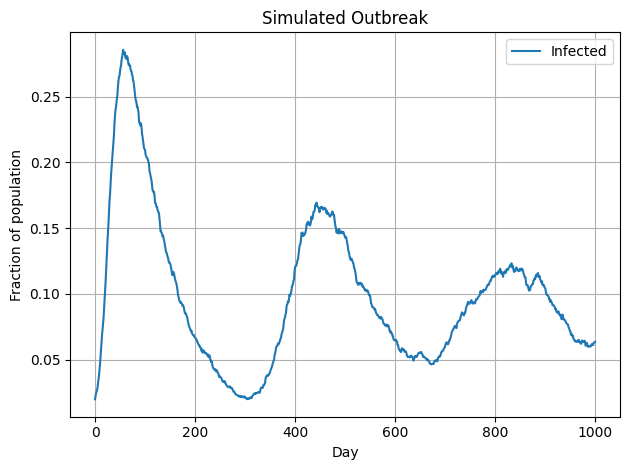

In [9]:
# plt.plot(sim_df['Day'], sim_df['S'], label='Susceptible')
plt.plot(sim_df['Day'], sim_df['I'], label='Infected')
# plt.plot(sim_df['Day'], sim_df['H'], label='Hospitalized')
# plt.plot(sim_df['Day'], sim_df['M'], label='Immune')
# plt.plot(sim_df['Day'], sim_df['D'], label='Dead')


plt.xlabel('Day')
plt.ylabel('Fraction of population')
plt.legend(loc = 'best')
plt.title('Simulated Outbreak')
plt.grid()
plt.tight_layout()

plt.show()

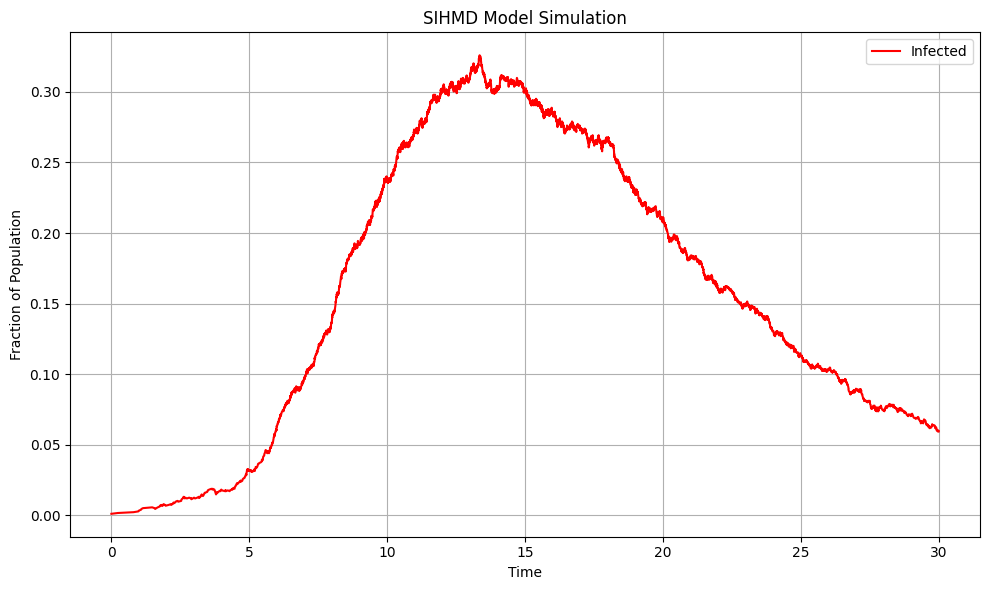

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/amyyy/OneDrive/Documents/GitHub/Code-collection--REU-25/SIHMD_agent_N1749.csv"

df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
# plt.plot(df['Time'], df['S'], label='Susceptible', color='blue')
plt.plot(df['Time'], df['I'], label='Infected', color='red')     
# plt.plot(df['Time'], df['H'], label='Hospitalized', color='orange')
# plt.plot(df['Time'], df['M'], label='Immune', color='green')
# plt.plot(df['Time'], df['D'], label='Dead', color='black')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIHMD Model Simulation')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [17]:
import io
import pandas as pd

file_path = "C:/Users/amyyy/Downloads/sihmd_batch_separated_2025-06-18T16-22-02-310Z (2).csv"



In [18]:
import pandas as pd

def read_trials_csv(file_path):
    data = []
    trial_num = None
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('# Trial'):
                trial_num = int(line.split()[-1])
                continue
            if line.startswith('Day') or not line:
                continue
            row = line.split(',')
            # Add trial number as first column
            data.append([trial_num] + row)
    # Build DataFrame
    columns = ['Trial', 'Day', 'S', 'I', 'H', 'M', 'D']
    df = pd.DataFrame(data, columns=columns)
    # Convert numeric columns
    df['Trial'] = df['Trial'].astype(int)
    df['Day'] = df['Day'].astype(int)
    for col in ['S', 'I', 'H', 'M', 'D']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Usage:
trials_df = read_trials_csv(file_path)

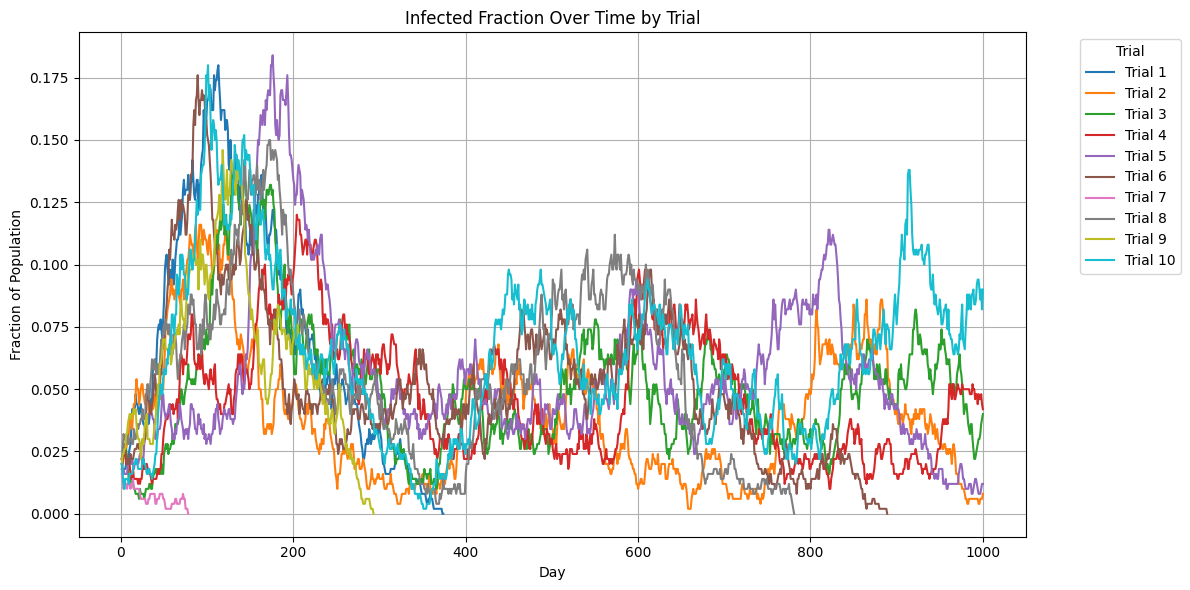

In [19]:
plt.figure(figsize=(12, 6))

for trial in trials_df['Trial'].unique():
    trials_data = trials_df[trials_df['Trial'] == trial]
    # Use the correct columns: '1' for Day, 'I' for infected fraction
    plt.plot(trials_data['Day'].astype(int), trials_data['I'].astype(float), label=f'Trial {trial}')

plt.xlabel('Day')
plt.ylabel('Fraction of Population')
plt.title('Infected Fraction Over Time by Trial')
plt.legend(title='Trial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

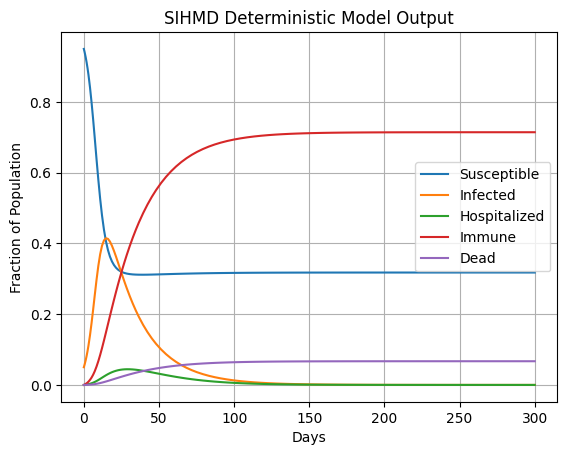

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

deterministic_file_path = "C:/Users/amyyy/OneDrive/Desktop/REU/sihmd_output_beta_0.501.csv"
deterministic_df = pd.read_csv(deterministic_file_path)
plt.plot(deterministic_df['Time'], deterministic_df['S'], label='Susceptible')
plt.plot(deterministic_df['Time'], deterministic_df['I'], label='Infected')
plt.plot(deterministic_df['Time'], deterministic_df['H'], label='Hospitalized')
plt.plot(deterministic_df['Time'], deterministic_df['M'], label='Immune')
plt.plot(deterministic_df['Time'], deterministic_df['D'], label='Dead')
plt.ylabel('Fraction of Population')
plt.xlabel('Days')
plt.title('SIHMD Deterministic Model Output')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()